<a href="https://colab.research.google.com/github/mbhuvanareddy18/smart_irrigation/blob/main/smart_irrigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Generate synthetic Smart Irrigation dataset
np.random.seed(42)
n_samples = 1000

temperature = np.random.normal(loc=30, scale=5, size=n_samples)
humidity = np.random.normal(loc=60, scale=10, size=n_samples)
soil_moisture = np.random.normal(loc=40, scale=15, size=n_samples)
rainfall = np.random.normal(loc=5, scale=3, size=n_samples)

# Label: 1 if dry and hot, low rainfall
irrigation_needed = (
    (soil_moisture < 35) & (rainfall < 5) & (temperature > 32)
).astype(int)

df = pd.DataFrame({
    "temperature": temperature,
    "humidity": humidity,
    "soil_moisture": soil_moisture,
    "rainfall": rainfall,
    "irrigation_needed": irrigation_needed
})

df.head()

,temperature,humidity,soil_moisture,rainfall,irrigation_needed
0,32.483571,73.993554,29.872326,-0.723423,1
1,29.308678,69.246337,37.832220,2.418845,0
2,33.238443,60.596304,28.113701,3.759183,1
3,37.615149,53.530632,35.380577,10.663063,0
4,28.829233,66.982233,11.595780,6.669659,0


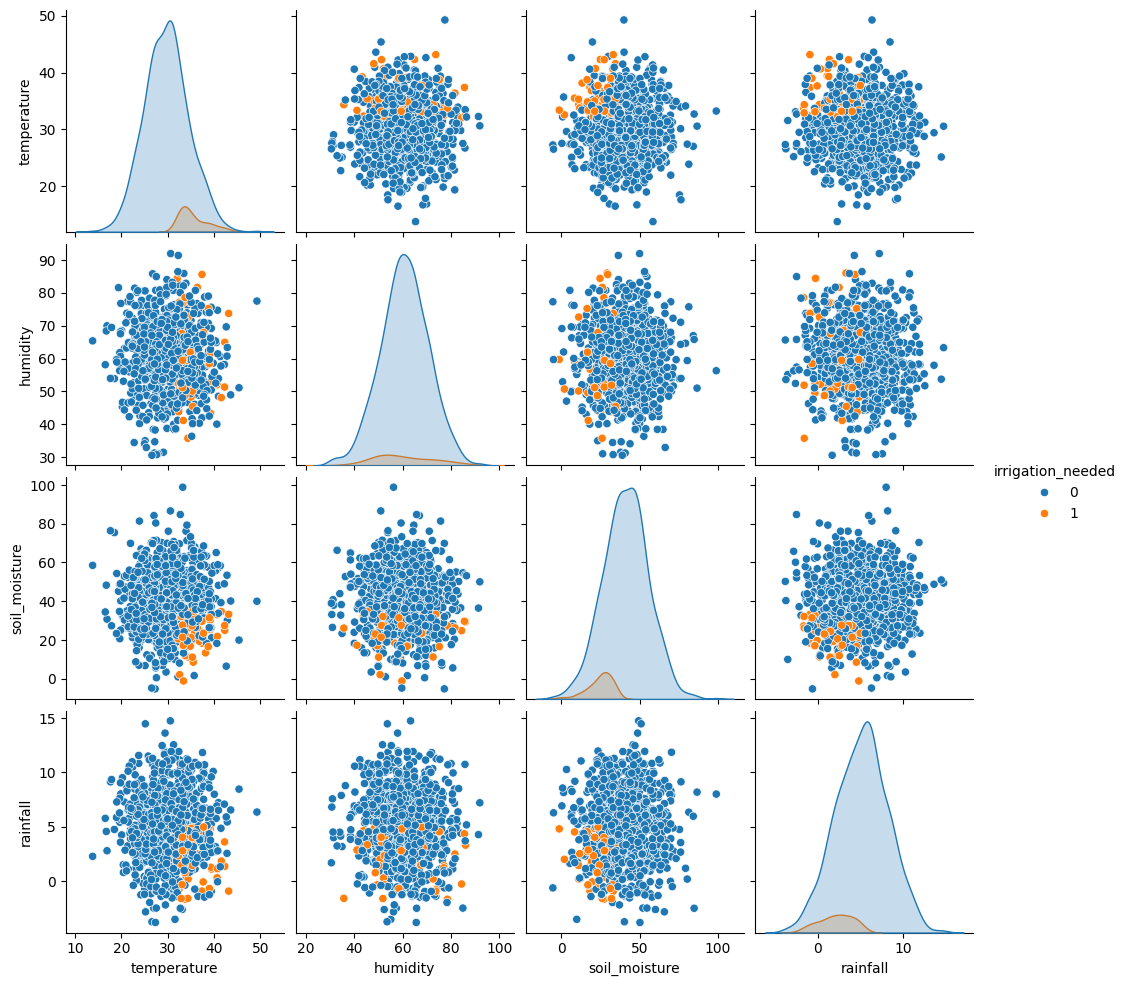

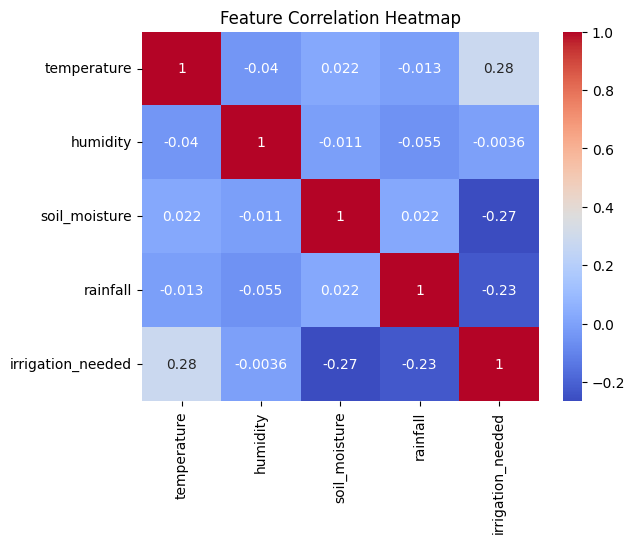

In [3]:

sns.pairplot(df, hue='irrigation_needed')
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
# Separate features (X) and target (y)
X = df.drop('irrigation_needed', axis=1)
y = df['irrigation_needed']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[191   0]
 [  0   9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00         9

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [11]:

import joblib

joblib.dump(model, "smart_irrigation_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully.")

✅ Model and scaler saved successfully.
